In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
depths = range(5,11)
lengths = [1,5,10,20,25,50,100,250,500,1000,2000]
enumData = pd.read_csv("enumData.csv")

for depth in depths:
  new_pd = enumData[enumData["max_depth"] == depth]
  new_pd.to_csv(f"{depth}_enum.csv")

In [ ]:
from collections import Counter
from random import sample

depths = range(5,11)
lengths = [1,5,10,20,25,50,100,250,500,1000,2000]
boards = range(1,19)
total = {"program":[],"board_id":[],"score":[],"max_depth":[],"sample_length":[]}

for i in depths:
  temp_df = pd.read_csv(f"{i}_enum.csv")[["program","board_id","score","max_depth","sample_length"]]
  for j in lengths:
    for k in boards:
      selected = temp_df[temp_df["sample_length"] == j]
      selected = selected[selected["board_id"] == k]
      try:
        selected = selected.iloc[sample(range(len(selected)),j)]
        total["program"] = selected["program"].to_list()
        total["board_id"] = selected["board_id"].to_list()
        total["score"] = selected["score"].to_list()
        total["max_depth"] = selected["max_depth"].to_list()
        total["sample_length"] =  selected["sample_length"].to_list()
        pd.DataFrame.from_dict(total).to_csv("enum_results.csv",mode="a",index=False,header=False)
      except:
        continue



In [ ]:
enumData = pd.read_csv("enum_results.csv")[["program","board_id","score","max_depth","sample_length"]]
hfpplData = pd.read_csv("hfppl_results.csv")
llmData = pd.read_csv("llm_results.csv")
llmData

#Enumeration Baseline

427826
330


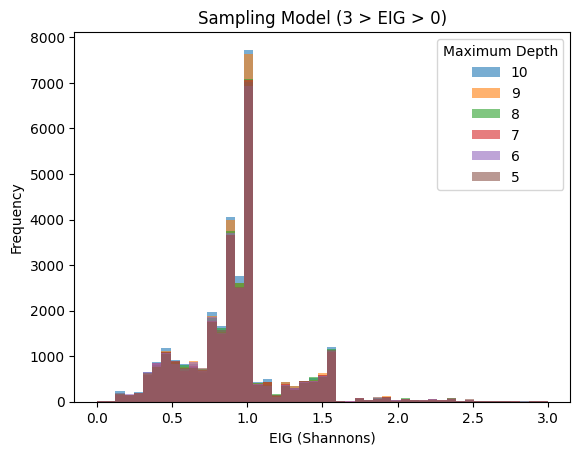

0.37946626874230016 2.479554
0.3785126157536096 4.731494
0.37072357607507334 4.731494
0.3650732766276819 4.731494
0.36383713317345023 4.731494
0.3624993576818482 4.731494


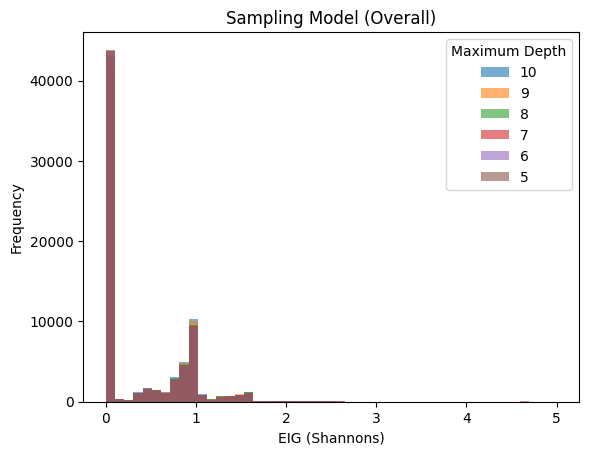

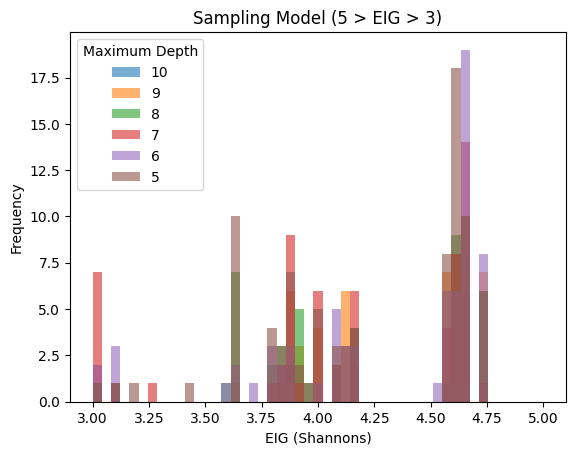

In [ ]:
enumNew = [enumData["score"][enumData['max_depth'] == i] for i in range(5,11)]

print(len(enumData))
print(len(enumData[enumData["score"] > 3]))

count = 11
for scores in enumNew:
  count -= 1
  plt.hist([i for i in scores if i < 3 and i > 0], label=count, alpha=0.6, bins=np.linspace(0,3,50,endpoint=True))
plt.legend(title="Maximum Depth", loc="upper right")
plt.title("Sampling Model (3 > EIG > 0)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = 11
for scores in enumNew:
  count -= 1
  plt.hist(scores, label=count, alpha=0.6, bins=np.linspace(0,5,50,endpoint=True))
  print(sum(scores)/len(scores), max(scores))
plt.legend(title="Maximum Depth", loc="upper right")
plt.title("Sampling Model (Overall)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = 11
for scores in enumNew:
  count -= 1
  plt.hist([i for i in scores if i < 5 and i > 3], label=count, alpha=0.6, bins=np.linspace(3,5,50,endpoint=True))

plt.legend(title="Maximum Depth", loc="upper left")
plt.title("Sampling Model (5 > EIG > 3)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

11


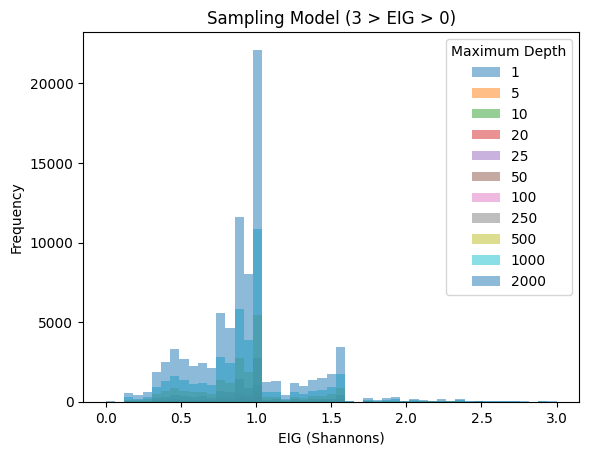

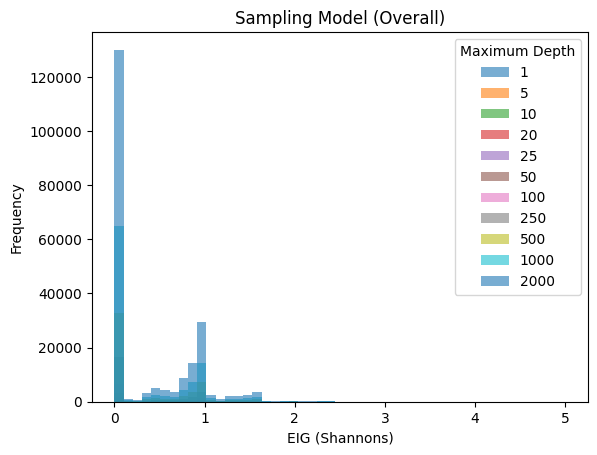

[[], [], [3.644671, 4.09463, 4.09463], [3.910782], [4.09463, 4.09463], [4.577348], [4.002896, 4.002896, 4.619552, 3.864242, 4.619552], [4.731494, 4.619552, 4.731494, 4.731494, 4.731494, 4.663079, 4.663079, 3.884286, 4.620629, 3.644671, 3.644671, 3.884286, 3.994077, 4.731494, 4.731494, 4.731494, 4.620629, 4.620629, 4.620629, 3.965943, 3.864242], [4.607812, 4.607812, 4.607812, 3.864242, 3.910782, 4.115834, 4.6353, 3.864242, 4.669496, 4.669496, 4.669496, 4.669496, 4.627698, 4.627698, 4.607812, 4.607812, 3.030693, 3.030693, 3.030693, 3.803904, 3.884286, 4.669496, 4.669496, 4.577348, 4.577348, 4.577348, 4.731494, 4.607812, 3.644671, 3.803904, 3.884286, 3.884286, 3.884286, 4.164905, 4.09463, 4.164905, 4.09463, 4.115834, 4.115834, 4.669496, 4.627698, 3.622775, 3.622775, 4.627698, 4.619552, 4.731494, 4.59056, 3.803904, 3.803904, 3.884286, 3.864242, 4.002896, 4.002896, 4.002896, 3.910782], [4.627698, 3.644671, 3.884286, 3.884286, 3.884286, 4.115834, 4.669496, 4.731494, 4.6353, 3.803904, 3.64467

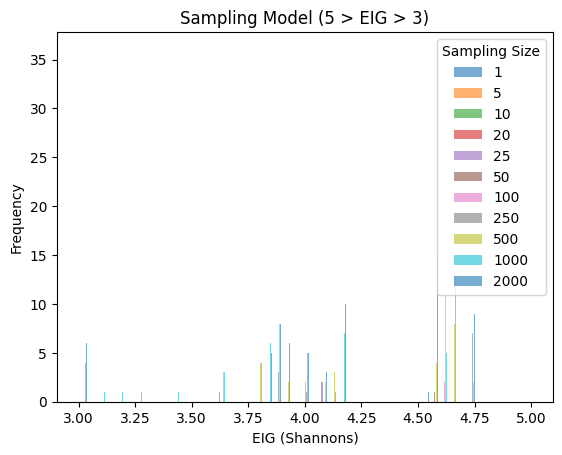

In [ ]:
enumNew = [enumData["score"][enumData['sample_length'] == i] for i in lengths]
print(len(enumNew))
count = -1
for scores in enumNew:
  count += 1
  plt.hist([i for i in scores if i < 3 and i > 0], label=lengths[count], alpha=0.5, bins=np.linspace(0,3,50,endpoint=True))
plt.legend(title="Maximum Depth", loc="upper right")
plt.title("Sampling Model (3 > EIG > 0)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = -1
for scores in enumNew:
  count += 1
  plt.hist([i for i in scores], label=lengths[count], alpha=0.6, bins=np.linspace(0,5,50,endpoint=True))
plt.legend(title="Maximum Depth", loc="upper right")
plt.title("Sampling Model (Overall)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()


plt.hist([[i for i in scores if i < 5 and i > 3] for scores in enumNew], label=[1,5,10,20,25,50,100,250,500,1000,2000], alpha=0.6, bins=np.linspace(3,5,50,endpoint=True))
print([[i for i in scores if i < 5 and i > 3] for scores in enumNew])
plt.legend(title="Sampling Size", loc="upper right")
plt.title("Sampling Model (5 > EIG > 3)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
enumNew = enumData["score"].to_list()

hfpplDataList, hfpplNew = hfpplData["score"].to_list(), []
for i in hfpplDataList:
  try:
    hfpplNew.append(float(i))
  except:
    pass

llmDataList, llmNew = llmData["eig"].to_list(),[]
for i in llmDataList:
  try:
    llmNew.append(float(i))
  except:
    pass

print(sum(enumNew)/len(enumNew), max(enumNew))
print(sum(hfpplNew)/len(hfpplNew), max(hfpplNew))
print(sum(llmNew)/len(llmNew), max(llmNew))
len(enumNew)

0.36398517895312843 4.669496
1.0853995628683757 4.726875
0.2179414740740742 1.0


23766

In [ ]:
plt.hist([i for i in enumNew if i > 0], bins=np.linspace(0,5,50,endpoint=True))
plt.show()
plt.hist([i for i in hfpplNew if i > 0], bins=np.linspace(0,5,50,endpoint=True))
plt.show()
plt.hist([i for i in llmNew if i > 0], bins=np.linspace(0,5,50,endpoint=True))
plt.show()

ValueError: ignored

#LLM Baseline

1.0
[0.993542, 0.997782, 0.991299, 0.910715, 0.957125, 0.931807, 0.99999, 0.845351, 0.992267, 0.872059, 0.0, 0.0, 0.744303, 0.927278, 0.398459, 0.985228, 0.970951, 1.0]


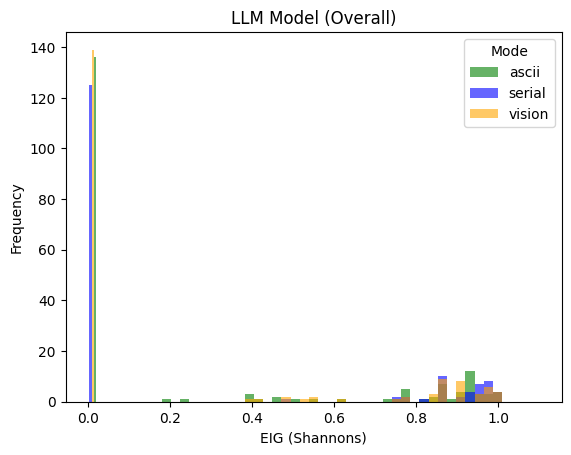

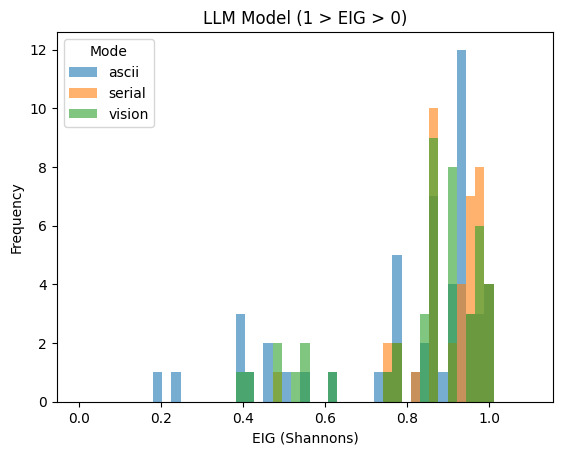

[3, 19, 1, 7, 2, 14, 16, 4, 4, 7, 0, 0, 0, 1, 0, 9, 16, 13]
[6, 19, 1, 8, 2, 14, 16, 4, 5, 8, 0, 0, 3, 1, 0, 9, 17, 13]
[8, 19, 3, 8, 2, 14, 16, 4, 7, 11, 0, 0, 3, 2, 2, 9, 17, 13]
[8, 19, 4, 8, 2, 14, 16, 4, 7, 11, 0, 0, 3, 3, 2, 9, 17, 13]


In [ ]:
contexts = range(1,19)
modes = ["ascii","serial","vision"]
print(max(llmData["eig"].to_list()))
llmModeFiltered = [llmData["eig"][llmData['mode'] == i] for i in modes]
llmContextFiltered = [llmData["eig"][llmData['context'] == i] for i in contexts]

print([max(score) for score in llmContextFiltered])
plt.hist([[i for i in score if i == 0] for score in llmModeFiltered], alpha=0.6, bins=np.linspace(0,1.1,50,endpoint=True), color=["blue","orange","green"])
colors=["blue","orange","green"]
count = -1
for mode in modes:
  count += 1
  plt.hist([i for i in llmModeFiltered[count] if i > 0], label=mode, alpha=0.6, bins=np.linspace(0,1.1,50,endpoint=True),color=colors[count-1])
plt.legend(title="Mode", loc="upper right")
plt.title("LLM Model (Overall)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = -1
for mode in modes:
  count += 1
  plt.hist([i for i in llmModeFiltered[count] if i > 0], label=mode, alpha=0.6, bins=np.linspace(0,1.1,50,endpoint=True))
plt.legend(title="Mode", loc="upper left")
plt.title("LLM Model (1 > EIG > 0)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

print([len([i for i in score if i > 0.75]) for score in llmContextFiltered])
print([len([i for i in score if i > 0.5]) for score in llmContextFiltered])
print([len([i for i in score if i > 0.25]) for score in llmContextFiltered])
print([len([i for i in score if i > 0]) for score in llmContextFiltered])

#Hybrid Baseline

In [ ]:
models = ["REGULAR","COMBINED"]
prefixes = ["What", "Where", "Which", "Does", "How", "Are"]
contexts = range(1,19)

hfpplModelFiltered = [hfpplData["score"][hfpplData['model_type'] == i] for i in models]
hfpplPrefixFiltered = [hfpplData["score"][hfpplData['prefix'] ==  i] for i in prefixes]
hfpplContextFiltered = [hfpplData["score"][hfpplData['trial_id'] ==  i] for i in contexts]


print((sum(hfpplModelFiltered[0])+sum(hfpplModelFiltered[1]))/(len(hfpplModelFiltered[0])+len(hfpplModelFiltered[1])))
print([sum(hfpplModelFiltered[i])/len(hfpplModelFiltered[i]) for i in range(2)])

count = -1
for model in models:
  count += 1
  plt.hist([i for i in hfpplModelFiltered[count]], label=model, alpha=0.6, bins=np.linspace(0,5,50,endpoint=True))
plt.legend(title="Model", loc="upper right")
plt.title("Hybrid Model (Overall)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = -1
for model in models:
  count += 1
  plt.hist([i for i in hfpplModelFiltered[count] if i > 0], label=model, alpha=0.6, bins=np.linspace(0,5,50,endpoint=True))
plt.legend(title="Model", loc="upper right")
plt.title("Hybrid Model (EIG > 0)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = -1
for prefix in prefixes:
  count += 1
  plt.hist([i for i in hfpplPrefixFiltered[count] if i > 0], label=prefix, alpha=0.6, bins=np.linspace(0,5,50,endpoint=True))
plt.legend(title="Model", loc="upper right")
plt.title("Hybrid Model (Divided by Initialization)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

count = -1
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
for context in contexts:
  count += 1
  plt.hist([i for i in hfpplContextFiltered[count] if i > 0], label=context, alpha=0.6, bins=np.linspace(0,5,50,endpoint=True), color=colors[count-1])
plt.legend(title="Context", loc="upper left", fontsize=5)
plt.title("Hybrid Model (Divided by Context)")
plt.xlabel("EIG (Shannons)")
plt.ylabel("Frequency")
plt.show()

#Efficiency Comparisons

In [ ]:
lengths = [1,5,10,20,25,50,100,250,500,1000,2000]
contexts = range(1,19)
sampling = pd.read_csv("sampling_results.csv")
hfppl = pd.read_csv("hfppl_results.csv")

scores = {}
for context in contexts:
  hfpplContext = hfppl[hfppl["trial_id"] == context].reset_index()
  maxHfppl = hfpplContext.iloc[hfpplContext["score"].idxmax()]["score"]
  scores[context] = [maxHfppl]
  for sample_length in lengths:
    samplingContext = sampling[sampling["board_id"] == context].reset_index()
    samplingContext = samplingContext[samplingContext["sample_length"] == sample_length].reset_index()

    try:
      maxSampling = samplingContext.iloc[samplingContext['score'].idxmax()]["score"]
    except:
      maxSampling = 0

    scores[context].append(maxSampling)

for context in contexts:
  print(str(scores[context])[1:-1].replace(", "," "))

In [ ]:
from collections import Counter

lengths = [1,5,10,20,25,50,100,250,500,1000,2000]
contexts = range(1,19)
sampling = pd.read_csv("sampling_results.csv")
hfppl = pd.read_csv("hfppl_results.csv")

eff = []
for context in contexts:
  for sample_length in lengths:
    samplingContext = sampling[sampling["board_id"] == context].reset_index()
    samplingContext = samplingContext[samplingContext["sample_length"] == sample_length].reset_index()
    hfpplContext = hfppl[hfppl["trial_id"] == context].reset_index()

    try:
      maxSampling = samplingContext.iloc[samplingContext['score'].idxmax()]
      sampling_efficiency = maxSampling["score"]/maxSampling["sample_length"]
    except:
      sampling_efficiency = 0

    maxHfppl = hfpplContext.iloc[hfpplContext["score"].idxmax()]
    model_type = maxHfppl["model_type"]
    hfppl_efficiency = maxHfppl["score"]/len(hfpplContext[hfpplContext["model_type"] == model_type])
    eff.append(sampling_efficiency>hfppl_efficiency)
    print(f"{context} {sample_length} {round(sampling_efficiency,3)},{round(hfppl_efficiency,3)},{sampling_efficiency>hfppl_efficiency}")
print(Counter(eff), len(eff))

KeyError: ignored

In [23]:
from contextlib import ContextDecorator
from collections import Counter
from random import sample
contexts = range(1,19)

df_dict = {"model":[],"sample_length":[],"attributes":[],"context":[],"max_eig":[],"valid":[]}

llm = pd.read_csv("llm_results.csv")
llm100 = pd.read_csv("llm100_results.csv")
sampling = pd.read_csv("sampling_results.csv")
hfppl = pd.read_csv("hfppl_results.csv")

#llm10
modes = ["ascii","serial","vision"]
for mode in modes:
  llm_new = llm[llm["mode"] == mode]
  for context in contexts:
    try:
      mList = llm_new[llm_new["context"] == context]["eig"].to_list()
      max_eig = max(mList)
      zero = Counter(mList)[0]/len(mList)
    except:
      max_eig = -0.0
      zero = 1

    df_dict["model"].append("GPT4")
    df_dict["sample_length"].append("10")
    df_dict["attributes"].append(mode)
    df_dict["context"].append(context)
    df_dict["max_eig"].append(max_eig)
    df_dict["valid"].append(1-zero)
    print("GPT4", "10", mode, context, max_eig, zero)

#llm100
modes = ["ascii","serial","vision"]
for mode in modes:
  llm100_new = llm100[llm100["mode"] == mode]
  for context in contexts:
    try:
      mList = llm100_new[llm100_new["context"] == str(context)]["eig"].to_list()
      max_eig = max(mList)
      zero = sum([float(i) <= 0 for i in mList])/len(mList) #(Counter(mList)[0]+Counter(mList)[0.0]+Counter(mList)[-0.0])/sum(Counter(mList).values())
    except IndexError:
      max_eig = -0.0
      zero = 1
    df_dict["model"].append("GPT4")
    df_dict["sample_length"].append("100")
    df_dict["attributes"].append(mode)
    df_dict["context"].append(context)
    df_dict["max_eig"].append(max_eig)
    df_dict["valid"].append(1-zero)
    print("GPT4", "100", mode, context, max_eig, zero)

#hfppl
information = ["REGULAR","COMBINED"]
particles = [1,3,5]
for context in contexts:
  hfppl_new = hfppl[hfppl["trial_id"] == context]
  for particle in particles:
    for awareness in information:
      try:
        mList = hfppl_new[hfppl_new["particle_num"] <= particle][hfppl_new["model_type"] == awareness]["score"].to_list()
        max_eig = max(mList)
        samples = len(hfppl_new[hfppl_new["particle_num"] <= particle][hfppl_new["model_type"] == awareness])
        zero = Counter(mList)[0]/len(mList)
      except:
        max_eig = -0.0
      extra = "(No board)" if awareness == "REGULAR" else ""
      df_dict["model"].append(f'SMC Steering {extra}')
      df_dict["sample_length"].append(samples)
      df_dict["attributes"].append(f"{awareness}_{particle}")
      df_dict["context"].append(context)
      df_dict["max_eig"].append(max_eig)
      df_dict["valid"].append(1-zero)
      print(f"SMC Steering {extra}", samples, f"{awareness}_{particle}",context,max_eig, zero)

#sampling
sampling_lengths = [10,100,1000,10000]
for context in contexts:
  sampling_new = sampling[sampling["board_id"] == context].reset_index()
  for sampling_length in sampling_lengths:
    max_samples = len(sampling_new["score"])
    temp = sampling_new["score"].to_list()
    sampled = sample(temp,sampling_length)
    max_eig = max(sampled)
    zero = Counter(sampled)[0]/len(sampled)
    df_dict["model"].append("Grammar")
    df_dict["sample_length"].append(sampling_length)
    df_dict["attributes"].append(sampling_length)
    df_dict["context"].append(context)
    df_dict["max_eig"].append(max_eig)
    df_dict["valid"].append(1-zero)
    print("Grammar",sampling_length, sampling_length, context,max_eig, zero)

df = pd.DataFrame.from_dict(df_dict)
df

GPT4 10 ascii 1 0.993542 0.4
GPT4 10 ascii 2 0.997782 0.3
GPT4 10 ascii 3 0.991299 0.7
GPT4 10 ascii 4 0.910715 0.6
GPT4 10 ascii 5 0.957125 0.8
GPT4 10 ascii 6 0.931807 0.1
GPT4 10 ascii 7 0.938722 0.3
GPT4 10 ascii 8 0.845351 0.8
GPT4 10 ascii 9 0.992267 0.9
GPT4 10 ascii 10 0.872059 0.7
GPT4 10 ascii 11 0.0 1.0
GPT4 10 ascii 12 0.0 1.0
GPT4 10 ascii 13 0.0 1.0
GPT4 10 ascii 14 0.927278 0.7
GPT4 10 ascii 15 0.398459 0.9
GPT4 10 ascii 16 0.985228 0.7
GPT4 10 ascii 17 0.970951 0.8
GPT4 10 ascii 18 0.954434 0.8
GPT4 10 serial 1 0.0 1.0
GPT4 10 serial 2 0.867056 0.7
GPT4 10 serial 3 0.0 1.0
GPT4 10 serial 4 0.0 1.0
GPT4 10 serial 5 0.0 1.0
GPT4 10 serial 6 0.931807 0.5
GPT4 10 serial 7 0.99999 0.5
GPT4 10 serial 8 0.0 1.0
GPT4 10 serial 9 0.992267 0.8
GPT4 10 serial 10 0.872059 0.4
GPT4 10 serial 11 0.0 1.0
GPT4 10 serial 12 0.0 1.0
GPT4 10 serial 13 0.744303 0.8
GPT4 10 serial 14 0.0 1.0
GPT4 10 serial 15 0.0 1.0
GPT4 10 serial 16 0.985228 0.8
GPT4 10 serial 17 0.970951 0.1
GPT4 10 seri

<ipython-input-23-5cf832b4e320>:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mList = hfppl_new[hfppl_new["particle_num"] <= particle][hfppl_new["model_type"] == awareness]["score"].to_list()
<ipython-input-23-5cf832b4e320>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  samples = len(hfppl_new[hfppl_new["particle_num"] <= particle][hfppl_new["model_type"] == awareness])


SMC Steering (No board) 128 REGULAR_5 4 2.269753 0.2734375
SMC Steering  125 COMBINED_5 4 1.872468 0.672
SMC Steering (No board) 44 REGULAR_1 5 2.114224 0.5909090909090909
SMC Steering  80 COMBINED_1 5 2.114224 0.7875
SMC Steering (No board) 88 REGULAR_3 5 2.114224 0.5909090909090909
SMC Steering  145 COMBINED_3 5 2.114224 0.8068965517241379
SMC Steering (No board) 110 REGULAR_5 5 2.114224 0.5909090909090909
SMC Steering  170 COMBINED_5 5 2.114224 0.7176470588235294
SMC Steering (No board) 92 REGULAR_1 6 4.726875 0.391304347826087
SMC Steering  80 COMBINED_1 6 4.726875 0.6
SMC Steering (No board) 184 REGULAR_3 6 4.726875 0.391304347826087
SMC Steering  160 COMBINED_3 6 4.726875 0.5875
SMC Steering (No board) 230 REGULAR_5 6 4.726875 0.391304347826087
SMC Steering  200 COMBINED_5 6 4.726875 0.585
SMC Steering (No board) 68 REGULAR_1 7 0.993942 0.9264705882352942
SMC Steering  77 COMBINED_1 7 2.684508 0.5974025974025974
SMC Steering (No board) 154 REGULAR_3 7 1.794662 0.935064935064935
S

,model,sample_length,attributes,context,max_eig,valid
0,GPT4,10,ascii,1,0.993542,0.6000
1,GPT4,10,ascii,2,0.997782,0.7000
2,GPT4,10,ascii,3,0.991299,0.3000
3,GPT4,10,ascii,4,0.910715,0.4000
4,GPT4,10,ascii,5,0.957125,0.2000
...,...,...,...,...,...,...
283,Grammar,10000,10000,17,2.272918,0.2916
284,Grammar,10,10,18,1.0,0.3000
285,Grammar,100,100,18,1.561278,0.1200
286,Grammar,1000,1000,18,1.561278,0.1540


In [26]:
from math import sqrt

samples = [10,100,1000,10000]
for sample in samples:
  current = df[df["model"]=="Grammar"][df["sample_length"]==sample]
  eigList = current["max_eig"].to_list()
  avgEig = sum(eigList)/len(eigList)
  stdDev = sqrt(sum([(i-avgEig)**2 for i in eigList])/len(eigList))
  avgValidity = sum(current["valid"].to_list())/len(current["valid"].to_list())
  print(" ".join(["sampling",str(sample),str(avgValidity),str(avgEig)+"_"+str(stdDev)]))

samples = [10,100]
models = ["ascii","serial","vision"]
for sample in samples:
  for model in models:
    current = df[df["model"]=="GPT4"][df["sample_length"]==str(sample)][df["attributes"] == model]
    eigList = current["max_eig"].to_list()
    avgEig = sum([float(i) for i in eigList])/len(eigList)
    stdDev = sqrt(sum([(float(i)-avgEig)**2 for i in eigList])/len(eigList))
    avgValidity = sum(current["valid"].to_list())/len(current["valid"].to_list())
    print(" ".join(["llm"+"_"+model,str(sample),str(avgValidity),str(avgEig)+"_"+str(stdDev)]))

particles = [1,3,5]
models = ["REGULAR","COMBINED"]
for model in models:
  for particle in particles:
    att = f"{model}_{particle}"
    extra = "(No board)" if model == "REGULAR" else ""
    current = df[df["model"]==f'SMC Steering {extra}'][df["attributes"] == att]
    eigList = current["max_eig"].to_list()
    avgEig = sum([float(i) for i in eigList])/len(eigList)
    stdDev = sqrt(sum([(float(i)-avgEig)**2 for i in eigList])/len(eigList))
    samplesList = current["sample_length"].to_list()
    avgSamples = sum(samplesList)/len(samplesList)
    samplesSD = sqrt(sum([(float(i)-avgSamples)**2 for i in samplesList])/len(samplesList))
    avgValidity = sum(current["valid"].to_list())/len(current["valid"].to_list())
    print(" ".join(["hybrid"+str(particle)+"_"+model,str(avgSamples)+"_"+str(samplesSD),str(avgValidity),str(avgEig)+"_"+str(stdDev)]))

sampling 10 0.37222222222222223 0.8967579444444443_0.3855204997049043
sampling 100 0.4016666666666666 1.9629094444444446_0.6774680262923626
sampling 1000 0.4060555555555556 3.169429222222222_0.9412629380201873
sampling 10000 0.40597777777777777 3.7712663333333336_0.856594455126358
llm_ascii 10 0.3055555555555555 0.7592788333333333_0.36407575823999566
llm_serial 10 0.22777777777777775 0.46211638888888895_0.46544687845662414
llm_vision 10 0.24444444444444446 0.5778273888888888_0.40397378661026717
llm_ascii 100 0.28888888888888886 0.9401079999999999_0.13422962371746905
llm_serial 100 0.25050505050505056 0.7477495555555554_0.4036550124388705
llm_vision 100 0.248989898989899 0.7932824999999999_0.3160397402242759
hybrid1_REGULAR 68.0_20.808652046684813 0.38133212336180594 2.087778277777778_1.0977830001729143
hybrid3_REGULAR 140.16666666666666_65.02414081622985 0.4050091029002561 2.2263053888888886_1.007098483622637
hybrid5_REGULAR 166.83333333333334_69.32872580844266 0.39662421398799186 2.28

<ipython-input-26-a2b5a3e89109>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current = df[df["model"]=="Grammar"][df["sample_length"]==sample]
<ipython-input-26-a2b5a3e89109>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current = df[df["model"]=="GPT4"][df["sample_length"]==str(sample)][df["attributes"] == model]
<ipython-input-26-a2b5a3e89109>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current = df[df["model"]==f'SMC Steering {extra}'][df["attributes"] == att]


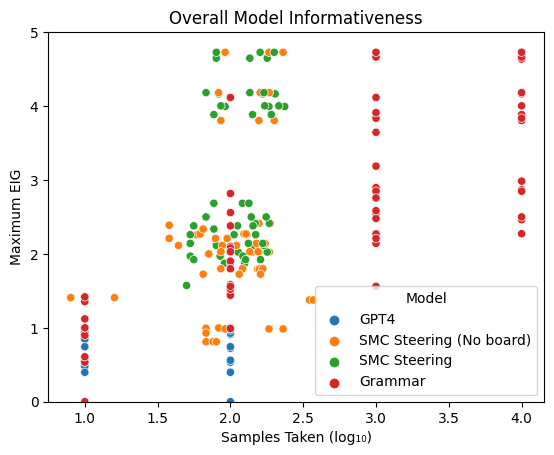

In [28]:
import seaborn as sns
from math import log
df.to_csv("plot_data.csv")
df = df.astype({"attributes":str})
df_plot = df[["sample_length","max_eig","model"]]
df_plot = df_plot.astype({"sample_length":float,"max_eig":float})
df_plot["sample_length"] = [log(i,10) for i in df_plot["sample_length"].to_list()]
df_plot = df_plot.rename(columns={"sample_length": "Samples Taken (log₁₀)", "max_eig": "Maximum EIG", "model":"Model"})
s = sns.scatterplot(data=df_plot, x='Samples Taken (log₁₀)', y='Maximum EIG',hue="Model")
s.set_ylim(0,5)
s = s.set(title="Overall Model Informativeness")